In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:\\Users\\USER-11\\Downloads\\employee_income.csv")

In [5]:
df.head()

,age,experience,income
0,50,5,45118
1,36,9,41691
2,29,3,35994
3,42,5,41614
4,40,12,51474


In [6]:
df.shape

(50, 3)

In [7]:
df.isnull().sum()

age           0
experience    0
income        0
dtype: int64

In [8]:
df.dtypes

age           int64
experience    int64
income        int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         50 non-null     int64
 1   experience  50 non-null     int64
 2   income      50 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [10]:
grouped=df.groupby('experience')['income'].value_counts()
print(grouped)

experience  income
0           28559     1
            33491     1
1           31661     1
            33440     1
            35800     1
3           35994     1
            37504     1
4           30702     1
            42981     1
5           41614     1
            45118     1
6           36078     1
            41331     1
7           38314     1
            46322     1
            46356     1
            48936     1
            49393     1
            51047     1
8           40363     1
            40942     1
            41673     1
            45457     1
            46088     1
9           39770     1
            41691     1
            42378     1
            49959     1
10          46015     1
11          42706     1
            46977     1
            50099     1
            50179     1
            50334     1
            55691     1
12          46790     1
            47016     1
            50284     1
            51474     1
            52390     1
13          44204    

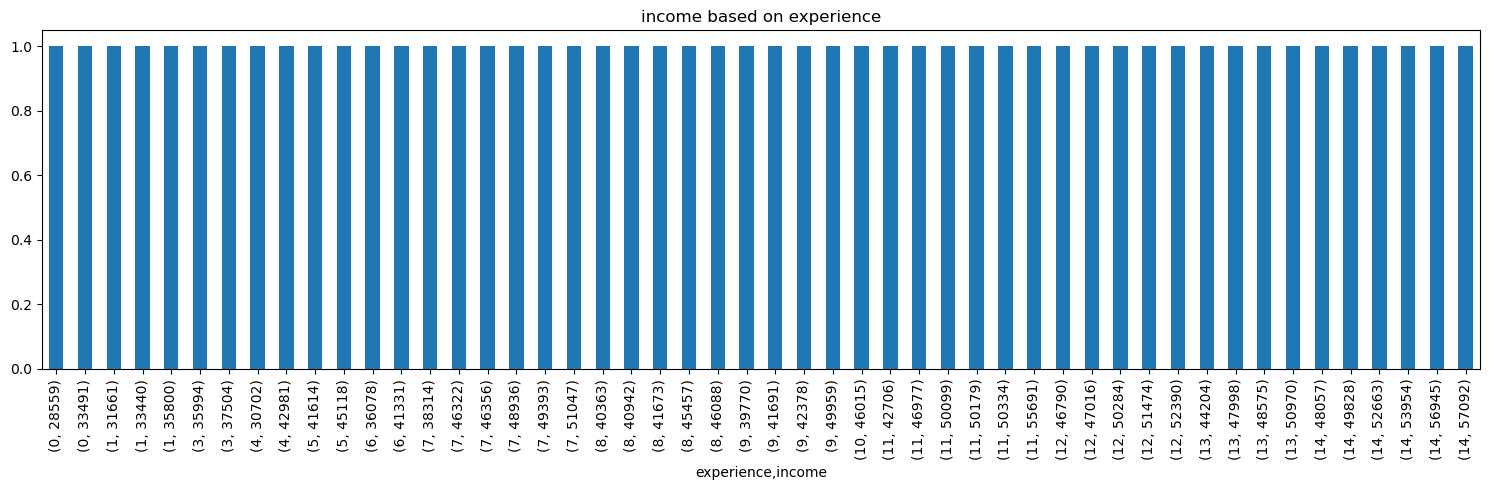

In [11]:
plt.figure(figsize=(15,5))
df.groupby('experience')['income'].value_counts().plot(kind='bar')
plt.title('income based on experience')
plt.tight_layout()
plt.show()

In [12]:
from sklearn .model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn .pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,r2_score

In [13]:
x = df.drop(['experience','income'],axis=1)
y = df['income']

In [14]:
numerical_cols = x.select_dtypes(include=['int64','float64']).columns.tolist()

In [15]:
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()

In [16]:
numerical_transformer= Pipeline (steps =[
                               ('imputer' ,SimpleImputer(strategy = 'mean')),
                                ('scaler',StandardScaler())
])

In [17]:
categorical_transformer = Pipeline(steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')),
                 ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [18]:
preprocessor = ColumnTransformer(transformers=[
                               ('num',numerical_transformer,numerical_cols),
                              ('cat',categorical_transformer,categorical_cols)
])

In [19]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
model_1 =Pipeline(steps=[
                     ('pre',preprocessor),('reg',RandomForestRegressor(n_estimators=100,random_state=42))
])

In [22]:
model_1.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('reg', RandomForestRegressor(random_state=42))])

In [23]:
prediction_1 = model_1.predict(X_test)


print(f'Accuracy:{r2_score(y_test,prediction_1):.4f}')

Accuracy:0.3200


In [24]:
from  sklearn .tree import DecisionTreeRegressor

In [25]:
model_2 =Pipeline(steps=[
                  ('pre',preprocessor),('reg',DecisionTreeRegressor(max_depth=5,random_state=42))
])

In [26]:
model_2.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('reg', DecisionTreeRegressor(max_depth=5, random_state=42))])

In [27]:
prediction_2 =model_2.predict(X_test)


print(f'Accuracy:{r2_score(y_test,prediction_2):.4f}')

Accuracy:0.4094


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model_3 = Pipeline(steps=[
                       ('pre',preprocessor),('reg',RandomForestClassifier(n_estimators=100,random_state=42))
])

In [30]:
model_3.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('reg', RandomForestClassifier(random_state=42))])

In [31]:
prediction_3 = model_3.predict(X_test)



print(f'Accuracy:{r2_score(y_test,prediction_3):.4f}')

Accuracy:0.4113
